# Logistic Regression

![Logistic Regression](https://drive.google.com/uc?export=view&id=1_zRhqUmMdznHJNGWQuH050wvr-5n_2WS)

**[Click Here](https://youtu.be/l8VEth6leXA) for the YouTube Video.**

In statistics logistic regression is used to model the probability of a certain class or event. I will be focusing more on the basics and implementation of the model, and not go too deep into the math part in this post.

Logistic regression is similar to linear regression because both of these involve estimating the values of parameters used in the prediction equation based on the given training data. Linear regression predicts the value of some continuous, dependent variable. Whereas logistic regression predicts the probability of an event or class that is dependent on other factors. Thus the output of logistic regression always lies between 0 and 1. Because of this property it is commonly used for classification purpose.


## Logistic Model
Consider a model with features *x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub> … x<sub>n</sub>*. Let the binary output be denoted by *Y*, that can take the values 0 or 1.  
Let *p* be the probability of *Y = 1*, we can denote it as *p = P(Y=1)*.  
The mathematical relationship between these variables can be denoted as:  

$$ ln(\frac{p}{1-p}) = b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n $$

Here the term $\frac{p}{1-p}$ is known as the *odds* and denotes the likelihood of the event taking place. Thus $ln(\frac{p}{1-p})$ is known as the *log odds* and is simply used to map the probabilty that lies between 0 and 1 to a range between $(-\infty, +\infty)$. The terms $b_0, b_1, b_2 ...$ are parameters (or weights) that we will estimate during training.   

So this is just the basic math behind what we are going to do. We are interested in the probability *p* in this equation. So we simplify the equation to obtain the value of p:  
1. The log term $ln$ on the LHS can be removed by raising the RHS as a power of $e$:  
$$ \frac{p}{1-p}  = e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n} $$
2. Now we can easily simplify to obtain the value of $p$:  
$$ p = \frac{e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n}}{1 + e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n}} $$
$$ or $$
$$ p = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n)}} $$   

This actually turns out to be the equation of the *Sigmoid Function* which is widely used in other machine learning applications. The *Sigmoid Function* is given by:
$$ S(x) = \frac{1}{1+e^{-x}} $$

Now we will be using the above derived equation to make our predictions. Before that we will train our model to obtain the values of our parameters $b_0, b_1, b_2 ...$ that result in least error. This is where the error or loss function comes in.

## Loss Function
The loss is basically the error in our predicted value. In other words it is a difference between our predicted value and the actual value. We will be using the [L2 Loss Function](https://afteracademy.com/blog/what-are-l1-and-l2-loss-functions) to calculate the error. Theoretically you can use any function to calculate the error. This function can be broken down as:
1. Let the actual value be $y_i$. Let the value predicted using our model be denoted as $\bar{y_i}$. Find the difference between the actual and predicted value.
2. Square this difference.
3. Find the sum across all the values in training data.
$$ L = \sum_{i = 1}^n(y_i - \bar{y_i})^2 $$  

Now that we have the error, we need to update the values of our parameters to minimize this error. This is where the "learning" actually happens, since our model is updating itself based on it's previous output to obtain a more accurate output in the next step. We will be using the *Gradient Descent Algorithm* to estimate our parameters. Another commonly used algorithm is the [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).


## The Gradient Descent Algorithm
You might know that the partial derivative of a function at it's minimum value is equal to 0. So gradient descent basically uses this concept to estimate the parameters or weights of our model by minimizing the loss function. [Click here](https://www.youtube.com/watch?v=4PHI11lX11I) for a more detailed explanation on how gradient descent works.  
For simplicity, for the rest of this tutorial let us assume that our ouptput depends only on a single feature $x$. So we can rewrite our equation as:
$$ \bar{y_i} = p = \frac{1}{1 + e^{-(b_0 + b_1x_i)}} = \frac{1}{1 + e^{-b_0 -b_1x_i}} $$  
Thus we need to estimate the values of weights $b_0$ and $b_1$ using our given training data.
1. Initially let $b_0=0$ and $b_1=0$. Let $L$ be the learning rate. The learning rate controls by how much the values of $b_0$ and $b_1$ are updated at each step in the learning process. Here let $L = 0.001$.
2. Calculate the partial derivative with respect to $b_0$ and $b_1$. The value of the partial derivative will tell us how far the loss function is from it's minimum value. It is a measure of how much our weights need to be updated to attain minimum or ideally 0 error. In case you have more than one feature, you need to calculate the partial derivative for each weight $b_0$, $b_1$ ... $b_n$ where $n$ is the number of features. For a detailed explanation on the math behind calculating the partial derivatives, check out [my video.](https://youtu.be/l8VEth6leXA)
$$ D_{b_0} = -2 \sum_{i=1}^n(y_i - \bar{y_i}) \times \bar{y_i} \times (1 - \bar{y_i}) $$
$$ D_{b_1} = -2 \sum_{i=1}^n(y_i - \bar{y_i}) \times \bar{y_i} \times (1 - \bar{y_i}) \times x_i $$
3. Next we update the values of $b_0$ and $b_1$:
$$ b_0 = b_0 - L \times D_{b_0} $$
$$ b_1 = b_1 - L \times D_{b_1} $$  
4. We repeat this process until our loss function is a very small value or ideally reaches 0 (meaning no errors and 100% accuracy). The number of times we repeat this learning process is known as iterations or epochs.



## Implementing the Model

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)
# Load the data
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


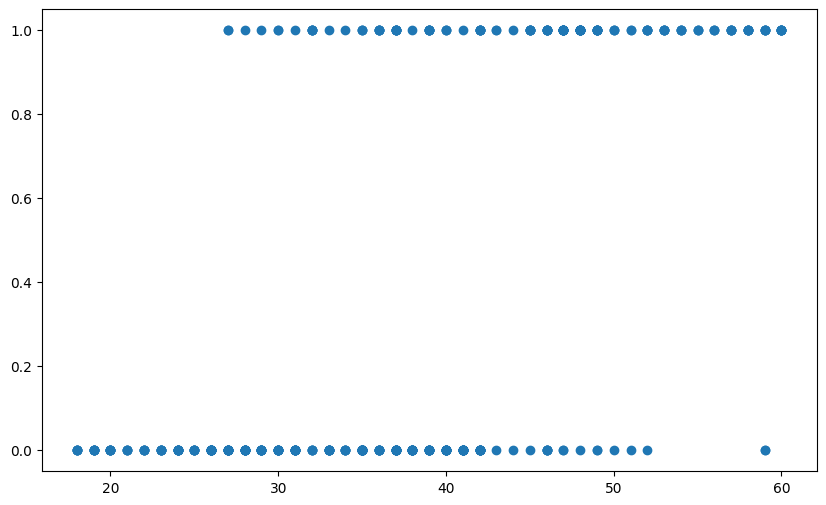

In [ ]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)

In [ ]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 400

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

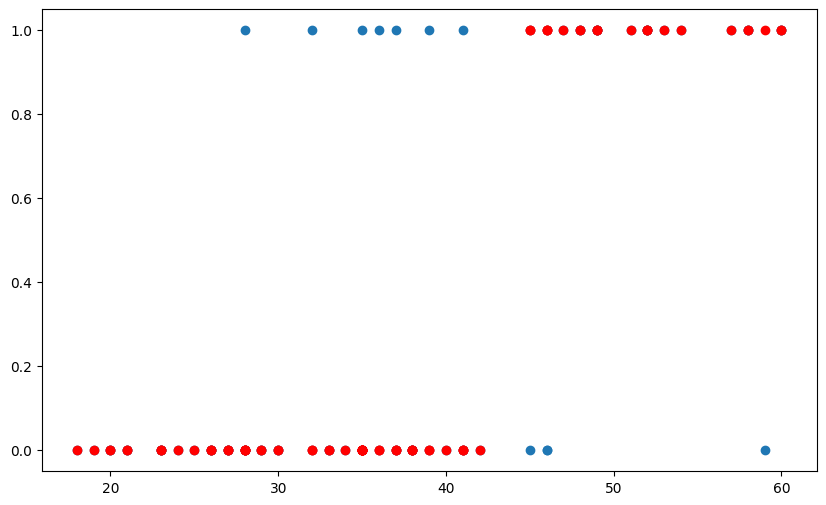

Accuracy = 0.8625


In [ ]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
# X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


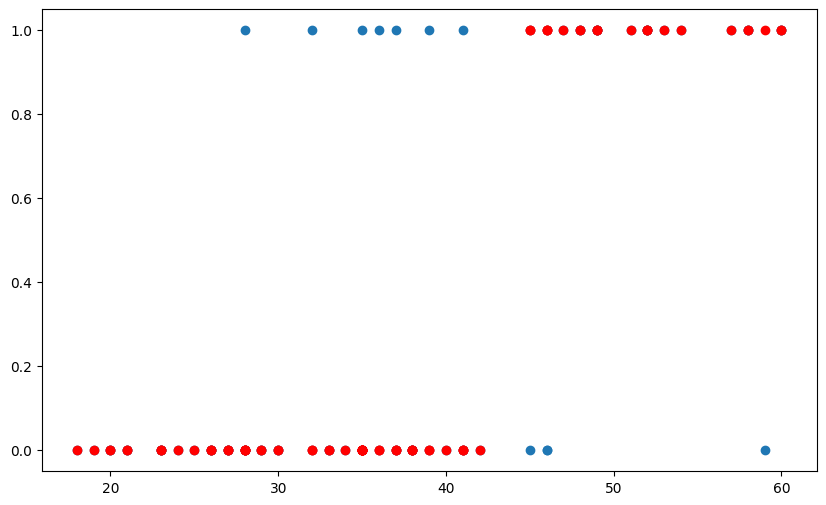

Accuracy = 0.8625


In [ ]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
points = {"blue":[[2,4],[1,3],[2,3],[3,2],[2,1]],"red":[[5,6],[4,5],[4,6],[6,6],[5,4]]}
new_point = [3,3]
class KnearestNeighbors:
  def __init__(self,k=3):
    self.k = k

  def fit(self,points):
    self.points = points
  def euclidian_distance(p,q):
    np.sqrt(np.sum((np.array(p)-np.array(q))**2))

  def predict(self, new_point):
    distances = []


    for category in self.points:
            for point in self.points[category]:
                distance = self.euclidian_distance(point, new_point)
                distances.append([distance, category])

    categories = [category[1] for category in sorted(distances)[:self.k]]
    result = Counter(categories).most_common(1)[0][0]
    return result





In [ ]:
points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]
class K_Nearest_Neighbors:

    def __init__(self, k=3):
        self.k = k

    def fit(self, points):
        self.points = points

    def euclidean_distance(self, p, q):
        np.sqrt(np.sum((np.array(p)-np.array(q))**2))

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = self.euclidean_distance(point, new_point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [ ]:
clf = K_Nearest_Neighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


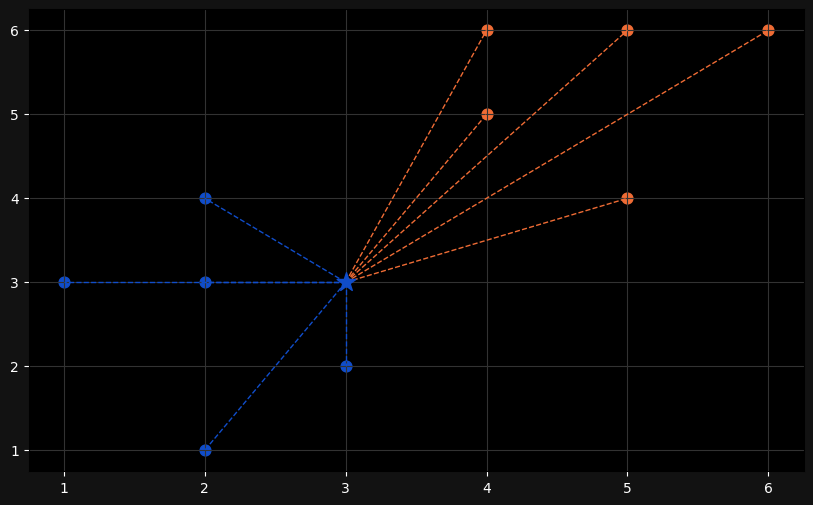

In [ ]:
ax = plt.subplot()
ax.grid(True, color='#323232')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
[ax.scatter(point[0], point[1], color='#104DCA', s=60) for point in points['blue']]
[ax.scatter(point[0], point[1], color='#EF6C35', s=60) for point in points['orange']]
new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)
[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1) for point in points['blue']]
[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1) for point in points['orange']]

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math
import operator


#### Start of STEP 1
# Importing data
data = pd.read_csv('iris.csv')
#### End of STEP 1

print(data.head(5))

# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):

    distances = {}
    sort = {}

    length = testInstance.shape[1]

    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):

        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1

    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2

    neighbors = []

    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}

    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]

        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5


testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

#### Start of STEP 2
# Setting number of neighbors = 1


print('\n\nWith 1 Nearest Neighbour \n\n')
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted Class of the datapoint = ', result)

# Nearest neighbor
print('\nNearest Neighbour of the datapoints = ',neigh)


print('\n\nWith 3 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 3
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

print('\n\nWith 5 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 5
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


With 1 Nearest Neighbour 



Predicted Class of the datapoint =  Iris-virginica

Nearest Neighbour of the datapoints =  [140]


With 3 Nearest Neighbours



Predicted class of the datapoint =  Iris-virginica

Nearest Neighbours of the datapoints =  [140, 138, 119]


With 5 Nearest Neighbours



Predicted class of the datapoint =  Iris-virginica

Nearest Neighbours of the datapoints =  [140, 138, 119, 144, 143]


['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


None


In [ ]:
data= pd.read_csv('iris.csv')
current_column_names = data.columns.tolist()

# Replace the last column name
last_column_index = -1
new_last_column_name = 'Name'  # replace this with your desired last column name
current_column_names[last_column_index] = new_last_column_name

# Update the column names in the DataFrame
data.columns = current_column_names

# Display the DataFrame with the updated last column name
print("\nDataFrame with Updated Last Column Name:")
print(data)



DataFrame with Updated Last Column Name:
     5.1  3.5  1.4  0.2            Name
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data.iloc[:,0:4], data['Name'])

# Predicted class
print(neigh.predict(test))

['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(neigh.kneighbors(test)[1])

[[140 138 119]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd

data = pd.read_csv('/content/Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:

# gender M and F converted to 0 and 1
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

features = data[['Gender', 'Age', 'EstimatedSalary']]
target = data['Purchased']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = 1 / (1 + np.exp(-model))  # sigmoid useage

            # gradient
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # updating weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = 1 / (1 + np.exp(-model))
        return [1 if i > 0.5 else 0 for i in predictions]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalization

scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# standardization

scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

In [ ]:

from sklearn.metrics import accuracy_score

def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegressionScratch()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

#evaluation:
accuracy_raw = evaluate_model(X_train, X_test, y_train, y_test)
accuracy_normalized = evaluate_model(X_train_normalized, X_test_normalized, y_train, y_test)
accuracy_standardized = evaluate_model(X_train_standardized, X_test_standardized, y_train, y_test)

print("\nAccuracy with raw data:", accuracy_raw)
print("Accuracy with normalized data:", accuracy_normalized)
print("Accuracy with standardized data:", accuracy_standardized)

<ipython-input-4-f35eb2a7ae4c>:15: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))  # sigmoid useage
<ipython-input-4-f35eb2a7ae4c>:27: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))



Accuracy with raw data: 0.6083333333333333
Accuracy with normalized data: 0.6083333333333333
Accuracy with standardized data: 0.8416666666666667


In [ ]:
 #trying to improve accuracy (needed?)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

def apply_logistic_regression(X_train, X_test, y_train, y_test, degree=1):
      model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      return accuracy_score(y_test, predictions)

accuracy_poly2 = apply_logistic_regression(X_train_standardized, X_test_standardized, y_train, y_test, degree=2)
print("Accuracy with degree 2 polynomial:", accuracy_poly2)

Accuracy with degree 2 polynomial: 0.9416666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from scratch
k_values = range(1, 22)
